# base setting

In [219]:
# Google drive mout
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
# Library import
import pandas as pd

import numpy as np
from numpy import linalg

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import cm
from matplotlib.ticker import LinearLocator

import seaborn as sns

import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


import missingno as msno
import urllib
import re
import random

from datetime import datetime


import sympy
# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')


# from vega_datasets import data
# from tabulate import tabulate

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# plt.style.use('seaborn')
# plt.style.use('default')
# sns.set(font_scale=1)

In [221]:
# 그래프 한글폰트 개선
# plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] =False
# plt.rc('font', family='NanumGothic')

In [222]:
# 그래프 한글폰트 개선
# !apt -qq -y install fonts-nanum > /dev/null
 
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=10)
# fm._rebuild()
 
# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'
 
# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

# Read and Cleaning

## Read Data

|변수|내용|
|---|---|
|Name|게임의 이름|
|Platform|게임이 지원되는 플랫폼의 이름|
|Year|게임이 출시된 연도|
|Genre|게임의 장르|
|Publisher|게임을 배급한 회사|
|NA_Sales|북미지역에서의 출고량|
|EU_Sales|유럽지역에서의 출고량|
|JP_Sales|일본지역에서의 출고량|
|Other_Sales|기타지역에서의 출고량|

In [223]:
path = '/content/drive/Shareddrives/coding/aib/AIB_section1_project/data/vgames2.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()
# Unnamed: 0 칼럼은 불필요함


(16598, 10)


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [224]:
df.drop(columns=['Unnamed: 0'], inplace=True) # Unnamed: 0 칼럼 제거
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

## Cleaning

### Name

In [225]:
df.Name

0                          Candace Kane's Candy Factory
1                                        The Munchables
2        Otome wa Oanesama Boku ni Koi Shiteru Portable
3                      Deal or No Deal: Special Edition
4             Ben 10 Ultimate Alien: Cosmic Destruction
                              ...                      
16593                           Ice Age 2: The Meltdown
16594                       Rainbow Islands: Revolution
16595                                          NBA 2K16
16596                       Toukiden: The Age of Demons
16597                          The King of Fighters '95
Name: Name, Length: 16598, dtype: object

In [226]:
# 결측데이터 갯수
df.Name.isna().sum() # 결측치 없음

0

In [227]:
# 중복값 갯수
df.Name.duplicated().sum()

5105

In [228]:
# 중복값 보기
Name_count = pd.DataFrame(df.Name.value_counts())
filt_p = Name_count.Name != 1
Name_count[filt_p]

,Name
Need for Speed: Most Wanted,12
FIFA 14,9
Ratatouille,9
Madden NFL 07,9
LEGO Marvel Super Heroes,9
...,...
Midnight Club: Street Racing,2
Dragon Quest Heroes: The World's Tree Woe and the Blight Below,2
Jewel Quest 5: The Sleepless Star,2
Dynasty Warriors: Gundam 3,2


In [229]:
df.Name = df.Name.str.strip()
df[df.Name == 'Need for Speed: Most Wanted']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.8,0.01,0.15
1511,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,20K,0.23,0,0.05
4672,Need for Speed: Most Wanted,GBA,2005.0,Racing,Electronic Arts,0.19,0.07,0,0
11042,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25
11335,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47
12177,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0,0.02
12529,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1
13617,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0,0.02
13808,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02


### Platform

In [230]:
df.Platform

0         DS
1        Wii
2        PSP
3         DS
4        PS3
        ... 
16593     GC
16594    PSP
16595    PS3
16596    PSV
16597     PS
Name: Platform, Length: 16598, dtype: object

In [231]:
df.Platform.value_counts().index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', '2600', 'GB',
       'NES', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG', 'PCFX'],
      dtype='object')

#### 게임 플렛폼 종류

- PC
  - [PC game](https://en.wikipedia.org/wiki/PC_game)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Personal_computer%2C_exploded_5.svg/375px-Personal_computer%2C_exploded_5.svg.png">  
</center>


- PS2
  - [PlayStation 2](https://en.wikipedia.org/wiki/PlayStation_2)  
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/PS2-Versions.jpg/330px-PS2-Versions.jpg">  
</center>


- DS
  - [Nintendo DS](https://en.wikipedia.org/wiki/Nintendo_DS)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Nintendo-DS-Fat-Blue.jpg/330px-Nintendo-DS-Fat-Blue.jpg">  
</center>


- PS
  - [PlayStation (console)](https://en.wikipedia.org/wiki/PlayStation_(console))
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/PSX-Console-wController.jpg/375px-PSX-Console-wController.jpg">  
</center>


- PS4
  - [PlayStation 4](https://en.wikipedia.org/wiki/PlayStation_4)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Sony-PlayStation-4-PS4-wDualShock-4.jpg/330px-Sony-PlayStation-4-PS4-wDualShock-4.jpg">  
</center>


- XBL
  - [Xbox network](https://en.wikipedia.org/wiki/Xbox_network)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/Xbox_Play_Anywhere_logo.svg/330px-Xbox_Play_Anywhere_logo.svg.png">  
</center>


- NS
  - [Nintendo Switch](https://en.wikipedia.org/wiki/Nintendo_Switch)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Nintendo-Switch-wJoyCons-BlRd-Standing-FL.jpg/450px-Nintendo-Switch-wJoyCons-BlRd-Standing-FL.jpg">  
</center>


- PSN
  - [PlayStation Network](https://en.wikipedia.org/wiki/PlayStation_Network)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/PlayStation_Network_logo_%282015%29.png/420px-PlayStation_Network_logo_%282015%29.png">  
</center>


- PS3
  - [PlayStation 3](https://en.wikipedia.org/wiki/PlayStation_3)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Sony-PlayStation-3-CECHA01-wController-L.jpg/375px-Sony-PlayStation-3-CECHA01-wController-L.jpg">  
</center>


- PSP
  - [PlayStation Portable](https://en.wikipedia.org/wiki/PlayStation_Portable)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Psp-1000.jpg/330px-Psp-1000.jpg">  
</center>


- XOne
  - [Xbox One](https://en.wikipedia.org/wiki/Xbox_One)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Microsoft-Xbox-One-Console-Set-wKinect.jpg/450px-Microsoft-Xbox-One-Console-Set-wKinect.jpg">  
</center>


- X360
  - [Xbox 360](https://en.wikipedia.org/wiki/Xbox_360)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Xbox-360S-Console-Set.jpg/128px-Xbox-360S-Console-Set.jpg">  
</center>


- Wii
  - [Wii](https://en.wikipedia.org/wiki/Wii)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Wii-console.jpg/330px-Wii-console.jpg">  
</center>


- GBA
  - [Game Boy Advance](https://en.wikipedia.org/wiki/Game_Boy_Advance)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Nintendo-Game-Boy-Advance-Purple-FL.jpg/450px-Nintendo-Game-Boy-Advance-Purple-FL.jpg">  
</center>


- GB
  - [Game Boy](https://en.wikipedia.org/wiki/Game_Boy)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Game-Boy-FL.jpg/330px-Game-Boy-FL.jpg">  
</center>


- SNES
  - [Super Nintendo Entertainment System](https://en.wikipedia.org/wiki/Super_Nintendo_Entertainment_System)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/SNES-Mod1-Console-Set.jpg/375px-SNES-Mod1-Console-Set.jpg">  
</center>


- 3DS
  - [Nintendo 3DS](https://en.wikipedia.org/wiki/Nintendo_3DS)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Nintendo-3DS-AquaOpen.jpg/225px-Nintendo-3DS-AquaOpen.jpg">  
</center>


- NES
  - [Nintendo Entertainment System](https://en.wikipedia.org/wiki/Nintendo_Entertainment_System)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/NES-Console-Set.jpg/330px-NES-Console-Set.jpg">  
</center>


- PSV
  - [PlayStation Vita](https://en.wikipedia.org/wiki/PlayStation_Vita)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/PlayStation-Vita-1101-FL.jpg/330px-PlayStation-Vita-1101-FL.jpg">  
</center>


- And
  - [Android (operating system)](https://en.wikipedia.org/wiki/Android_(operating_system))
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Android_logo_2019_%28stacked%29.svg/182px-Android_logo_2019_%28stacked%29.svg.png">  
</center>


- XB
  - [Xbox (console)](https://en.wikipedia.org/wiki/Xbox_(console))
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Xbox-console.jpg/375px-Xbox-console.jpg">  
</center>


- GEN
  - [Sega Genesis](https://en.wikipedia.org/wiki/Sega_Genesis)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Sega-Mega-Drive-JP-Mk1-Console-Set.jpg/375px-Sega-Mega-Drive-JP-Mk1-Console-Set.jpg">  
</center>


- DSiW
  - [List of DSiWare games and applications](https://en.wikipedia.org/wiki/List_of_DSiWare_games_and_applications)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/DSi_Ware_Logo.svg/330px-DSi_Ware_Logo.svg.png">  
</center>


- SAT
  - [Sega Saturn](https://en.wikipedia.org/wiki/Sega_Saturn)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Sega-Saturn-Console-Set-Mk1.png/375px-Sega-Saturn-Console-Set-Mk1.png">  
</center>


- OSX
  - [macOS](https://en.wikipedia.org/wiki/MacOS)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/MacOS_wordmark_%282017%29.svg/188px-MacOS_wordmark_%282017%29.svg.png">  
</center>


- VC
  - [Virtual Console](https://en.wikipedia.org/wiki/Virtual_Console)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Virtual_console_Logo.svg/375px-Virtual_console_Logo.svg.png">  
</center>


- GC
  - [GameCube](https://en.wikipedia.org/wiki/GameCube)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/GameCube-Set.jpg/330px-GameCube-Set.jpg">  
</center>


- DC
  - [Dreamcast](https://en.wikipedia.org/wiki/Dreamcast)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Dreamcast-Console-Set.png/330px-Dreamcast-Console-Set.png">  
</center>


- WiiU
  - [Wii U](https://en.wikipedia.org/wiki/Wii_U)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Wii_U_Console_and_Gamepad.png/330px-Wii_U_Console_and_Gamepad.png">  
</center>


- 2600
  - [Atari 2600](https://en.wikipedia.org/wiki/Atari_2600)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Atari-2600-Wood-4Sw-Set.png/330px-Atari-2600-Wood-4Sw-Set.png">  
</center>


- WW
  - [WiiWare](https://en.wikipedia.org/wiki/WiiWare)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Logo_wiiware.svg/300px-Logo_wiiware.svg.png">  
</center>


- PCE
  - [TurboGrafx-16/PC Engine](https://en.wikipedia.org/wiki/TurboGrafx-16)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/TurboGrafx16-Console-Set.jpg/375px-TurboGrafx16-Console-Set.jpg">  
</center>


- Series
  - []()
<center>
<img alt="image" 
width=30% 
src="">  
</center>


- XS
  - [Xbox Series X and Series S](https://en.wikipedia.org/wiki/Xbox_Series_X_and_Series_S)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Xbox_Series_S_with_controller.jpg/330px-Xbox_Series_S_with_controller.jpg">  
</center>


- PS5
  - [PlayStation 5](https://en.wikipedia.org/wiki/PlayStation_5)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/PlayStation_5_and_DualSense_with_transparent_background.png/330px-PlayStation_5_and_DualSense_with_transparent_background.png">  
</center>


- N64
  - [Nintendo 64](https://en.wikipedia.org/wiki/Nintendo_64)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/N64-Console-Set.jpg/330px-N64-Console-Set.jpg">  
</center>


- Linux
  - []()
<center>
<img alt="image" 
width=30% 
src="">  
</center>


- MS
  - [Master System](https://en.wikipedia.org/wiki/Master_System)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Sega-Master-System-Set.jpg/375px-Sega-Master-System-Set.jpg">  
</center>


- GG
  - [Game Gear](https://en.wikipedia.org/wiki/Game_Gear)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Sega-Game-Gear-WB.png/375px-Sega-Game-Gear-WB.png">  
</center>


- 3DO
  - [3DO Interactive Multiplayer](https://en.wikipedia.org/wiki/3DO_Interactive_Multiplayer)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/3DO-FZ1-Console-Set.jpg/450px-3DO-FZ1-Console-Set.jpg">  
</center>


- SCD
  - [Sega CD](https://en.wikipedia.org/wiki/Sega_CD)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Sega-CD-Model1-Set.jpg/375px-Sega-CD-Model1-Set.jpg">  
</center>


- WS
  - [WonderSwan](https://en.wikipedia.org/wiki/WonderSwan)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/WonderSwan-Color-Blue-Left.jpg/263px-WonderSwan-Color-Blue-Left.jpg">  
</center>


- NG
  - [Neo Geo](https://en.wikipedia.org/wiki/Neo_Geo)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Neo-Geo-AES-Console-Set.jpg/330px-Neo-Geo-AES-Console-Set.jpg">  
</center>


- iOS
  - []()
<center>
<img alt="image" 
width=30% 
src="">  
</center>


- Int
  - [Intellivision](https://en.wikipedia.org/wiki/Intellivision)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Intellivision-Console-Set.jpg/330px-Intellivision-Console-Set.jpg">  
</center>


- Lynx
  - [Atari Lynx](https://en.wikipedia.org/wiki/Atari_Lynx)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Atari-Lynx-I-Handheld.jpg/330px-Atari-Lynx-I-Handheld.jpg">  
</center>


- DSi
  - [List of DSiWare games and applications](https://en.wikipedia.org/wiki/List_of_DSiWare_games_and_applications)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/DSi_Ware_Logo.svg/330px-DSi_Ware_Logo.svg.png">  
</center>


- AJ
  - [Atari Jaguar](https://en.wikipedia.org/wiki/Atari_Jaguar)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Atari-Jaguar-Console-Set.jpg/330px-Atari-Jaguar-Console-Set.jpg">  
</center>


- 5200
  - [Atari 5200](https://en.wikipedia.org/wiki/Atari_5200)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Atari-5200-4-Port-wController-L.jpg/330px-Atari-5200-4-Port-wController-L.jpg">  
</center>


- WinP
  - [Windows Phone](https://en.wikipedia.org/wiki/Windows_Phone)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/en/4/48/WP8.1_Start_Screen.png">  
</center>


- PCFX
  - [PC-FX](https://en.wikipedia.org/wiki/PC-FX)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/PC-FX-Console-Set.jpg/330px-PC-FX-Console-Set.jpg">  
</center>


- BRW
  - [Browser game](https://en.wikipedia.org/wiki/Browser_game)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Freeciv-net-screenshot-2011-06-23.png/330px-Freeciv-net-screenshot-2011-06-23.png">  
</center>


- NGage
  - [N-Gage (device)](https://en.wikipedia.org/wiki/N-Gage_(device))
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Nokia-NGage-LL.jpg/390px-Nokia-NGage-LL.jpg">  
</center>


- 7800
  - [Atari 7800](https://en.wikipedia.org/wiki/Atari_7800)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Atari-7800-Console-Set.jpg/330px-Atari-7800-Console-Set.jpg">  
</center>


- GIZ
  - [Gizmondo](https://en.wikipedia.org/wiki/Gizmondo)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Gizmondo.jpg/375px-Gizmondo.jpg">  
</center>


- Arc
  - [Arcade game](https://en.wikipedia.org/wiki/Arcade_game)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Daikeien_amusement_arcade_2018-05-10.jpg/330px-Daikeien_amusement_arcade_2018-05-10.jpg">  
</center>


- CV
  - [ColecoVision](https://en.wikipedia.org/wiki/ColecoVision)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/ColecoVision-wController-L.jpg/450px-ColecoVision-wController-L.jpg">  
</center>


- C64
  - [Commodore 64](https://en.wikipedia.org/wiki/Commodore_64)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Commodore-64-Computer-FL.jpg/330px-Commodore-64-Computer-FL.jpg">  
</center>


- OR
  - [Oculus Rift](https://en.wikipedia.org/wiki/Oculus_Rift)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Oculus-Rift-CV1-Headset-Front_with_transparent_background.png/330px-Oculus-Rift-CV1-Headset-Front_with_transparent_background.png">  
</center>


- Amig
  - [Amiga CD32](https://en.wikipedia.org/wiki/Amiga_CD32)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Amiga-CD32-wController-L.jpg/375px-Amiga-CD32-wController-L.jpg">  
</center>


- MSD
  - [MS-DOS](https://en.wikipedia.org/wiki/MS-DOS)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/b/b6/StartingMsdos.png">  
</center>


- Ouya
  - [Ouya](https://en.wikipedia.org/wiki/Ouya)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/OUYA-Console-set-h.jpg/330px-OUYA-Console-set-h.jpg">  
</center>


- VB
  - [Virtual Boy](https://en.wikipedia.org/wiki/Virtual_Boy)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Virtual-Boy-Set.jpg/300px-Virtual-Boy-Set.jpg">  
</center>


- ACPC
  - [Amstrad CPC](https://en.wikipedia.org/wiki/Amstrad_CPC)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Amstrad_CPC464.jpg/435px-Amstrad_CPC464.jpg">  
</center>


- Mob
  - []()
<center>
<img alt="image" 
width=30% 
src="">  
</center>


- ZXS
  - [ZX Spectrum](https://en.wikipedia.org/wiki/ZX_Spectrum)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/ZXSpectrum48k.jpg/330px-ZXSpectrum48k.jpg">  
</center>


- AST
  - [Atari ST](https://en.wikipedia.org/wiki/Atari_ST)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Atari_1040STf.jpg/330px-Atari_1040STf.jpg">  
</center>


- iQue
  - [iQue Player](https://en.wikipedia.org/wiki/IQue_Player)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Nintendo-N64-iQue-Player-FL.jpg/330px-Nintendo-N64-iQue-Player-FL.jpg">  
</center>


- GBC
  - [Game Boy Color](https://en.wikipedia.org/wiki/Game_Boy_Color)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Nintendo-Game-Boy-Color-FL.jpg/330px-Nintendo-Game-Boy-Color-FL.jpg">  
</center>


- MSX
  - [MSX](https://en.wikipedia.org/wiki/MSX)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Sony_HitBit_HB-10P_%28White_Background%29.jpg/330px-Sony_HitBit_HB-10P_%28White_Background%29.jpg">  
</center>


- CDi
  - [CD-i](https://en.wikipedia.org/wiki/CD-i)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/CD-i-910-Console-Set.jpg/330px-CD-i-910-Console-Set.jpg">  
</center>


- ApII
  - [Apple II](https://en.wikipedia.org/wiki/Apple_II)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Apple_II_typical_configuration_1977.png/330px-Apple_II_typical_configuration_1977.png">  
</center>


- S32X
  - [32X](https://en.wikipedia.org/wiki/32X)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Sega-Genesis-Model2-32X.jpg/330px-Sega-Genesis-Model2-32X.jpg">  
</center>


- CD32
  - [Amiga CD32](Amiga CD32)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Amiga-CD32-wController-L.jpg/375px-Amiga-CD32-wController-L.jpg">  
</center>


- FMT
  - [FM Towns Marty](https://en.wikipedia.org/wiki/FM_Towns_Marty)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/FM-Towns-Marty-Console-Set.jpg/330px-FM-Towns-Marty-Console-Set.jpg">  
</center>


- TG16
  - [TurboGrafx-16](https://en.wikipedia.org/wiki/TurboGrafx-16)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/TurboGrafx16-Console-Set.jpg/375px-TurboGrafx16-Console-Set.jpg">  
</center>


- C128
  - [Commodore 128](https://en.wikipedia.org/wiki/Commodore_128)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Commodore-128.jpg/420px-Commodore-128.jpg">  
</center>


- Aco
  - [Acorn Electron](https://en.wikipedia.org/wiki/Acorn_Electron)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Acorn_Electron_4x3.jpg/330px-Acorn_Electron_4x3.jpg">  
</center>


- BBCM
  - [BBC Micro](https://en.wikipedia.org/wiki/BBC_Micro)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/BBC_Micro_Front_Restored.jpg/375px-BBC_Micro_Front_Restored.jpg">  
</center>























<center>
<img alt="image" 
width=70% 
src="http://2.bp.blogspot.com/-OVbxM9S3i_g/VaJO_m19M9I/AAAAAAAAABw/-6jWX6KuyRQ/s1600/GamePlatforms.jpg">  
</center>

- [게임 기획자로 사는 지혜](http://makhunta.blogspot.com/2015/07/1.html)  
- [games Platform Totals](https://www.vgchartz.com/charts/platform_totals/Hardware.php/)

In [232]:
pc = ['PC', 'OSX', 'Series', 'Linux', 'BRW', 'MSD', 'ACPC', 'MSX', 'ApII', 'All']
mobile = ['And', 'iOS', 'WinP', 'Mob']
console = ['PS2', 'PS', 'PS4', 'PS3', 'XOne', 'X360', 'Wii', 'SNES', 'NES', 'XB', 'GEN', 'SAT', 'VC', 'GC', 'DC', 
           '2600', 'PCE', 'XS', 'PS5', 'N64', 'MS', '3DO', 'SCD', 'NG', 'Int', 'DSi', 'AJ', '5200', 'PCFX', '7800', 'CV', 'C64', 
           'Amig', 'Ouya', 'ZXS', 'AST', 'iQue', 'CDi', 'S32X', 'CD32', 'FMT', 'TG16', 'C128', 'Aco', 'BBCM']
portable = ['DS', 'NS', 'PSP', 'GBA', 'GB', '3DS', 'PSV', 'WiiU', 'GG', 'WS', 'Lynx', 'NGage', 'GIZ', 'GBC', ]
arcade = ['Arc']
network = ['XBL', 'PSN']
vr = ['OR', 'VB', 'DSiW', 'WW']

In [233]:
df['Platform_2'] = 'pc'
df.iloc[df[df.Platform.isin(mobile)].index, -1] = 'mobile'
df.iloc[df[df.Platform.isin(console)].index, -1] = 'console'
df.iloc[df[df.Platform.isin(portable)].index, -1] = 'portable'
df.iloc[df[df.Platform.isin(arcade)].index, -1] = 'arcade'
df.iloc[df[df.Platform.isin(network)].index, -1] = 'network'
df.iloc[df[df.Platform.isin(vr)].index, -1] = 'vr'

In [234]:
df['Platform_2'].value_counts()

console     10270
portable     5368
pc            960
Name: Platform_2, dtype: int64

In [235]:
df['Platform_2'].isna().sum()

0

### Year

In [236]:
# type
df.Year.dtypes # 정수형으로 변환 필요

dtype('float64')

In [237]:
# 결측데이터 보기
df.Year.isna().sum() # 결측치 있음

271

In [238]:
df.Year.fillna(9999, inplace=True)
df.Year.isna().sum()

0

In [239]:
# data 확인
df.Year.value_counts()

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
14.0         2
1.0          2
2020.0       1
86.0         1
94.0         1
Name: Year, Length: 63, dtype: int64

In [240]:
df.Year = df.Year.astype(str) # 데이터타입 변환

In [241]:
df[df.Year.str.split('.').str[1] != '0'].shape # 소수점아래가 모두 0

(0, 10)

In [242]:
df.Year = df.Year.str.split('.').str[0]
df.Year = df.Year.astype(int) # 데이터타입 정수형으로 변환
df.Year.dtypes

dtype('int64')

In [243]:
print(f"""\
출시년도가 40 이하인 케이스 수    : {df.query('Year <= 40').shape[0]}
40 < 출시년도 <=99 케이스 수      : {df.query('Year > 40 & Year <= 99').shape[0]}
""")

출시년도가 40 이하인 케이스 수    : 86
40 < 출시년도 <=99 케이스 수      : 14



In [244]:
filt_40 = df.Year <= 40 # 출시년도가 40 이하인 케이스 필터링
df[filt_40].index
df.iloc[df[filt_40].index, 2] = df.iloc[df[filt_40].index, 2] + 2000 # 기존값에 +2000
df[filt_40].Year.value_counts() # 출시년도가 40 이하인 케이스 +2000 완료

2009    10
2011    10
2008    10
2003     7
2006     7
2010     7
2015     5
2016     5
2004     4
2005     4
2007     3
2002     3
2000     3
2001     2
2014     2
2013     2
2012     2
Name: Year, dtype: int64

In [245]:
filt_99 = df.Year <= 99 # 출시년도가 99 이하인 케이스 필터링
df[filt_99].index
df.iloc[df[filt_99].index, 2] = df.iloc[df[filt_99].index, 2] + 1900 # 기존값에 +1900
df[filt_99].Year.value_counts() # 출시년도가 30 이하인 케이스 +1900 완료

1995    4
1996    3
1998    3
1997    2
1986    1
1994    1
Name: Year, dtype: int64

In [246]:
print(df.Year.isna().sum())
df.Year.value_counts()

0


2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
9999     271
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

### Genre

In [247]:
df.Genre.value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [248]:
df.Genre.isna().sum()

50

In [249]:
df['Genre'].fillna('Unknown', inplace=True)
df.Genre.isna().sum()

0

### Publisher

In [250]:
df.Publisher.isna().sum()

58

In [251]:
df[df.Publisher == 'Unknown'].shape # 배급사가 Unkown인 케이스가 203개 있음

(203, 10)

In [252]:
df['Publisher'].fillna('Unknown', inplace=True)
df.Publisher.isna().sum()

0

### XX_Sales

In [253]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Platform_2'],
      dtype='object')

In [254]:
sale_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [255]:
df[sale_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NA_Sales     16598 non-null  object
 1   EU_Sales     16598 non-null  object
 2   JP_Sales     16598 non-null  object
 3   Other_Sales  16598 non-null  object
dtypes: object(4)
memory usage: 518.8+ KB


In [256]:
df[sale_list].head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04


In [257]:
for i in sale_list:
  print(i, ' : ', df[i].str.contains(pat='[^\d]', regex=True).sum()) # 숫자가 아닌것

NA_Sales  :  12135
EU_Sales  :  10926
JP_Sales  :  6259
Other_Sales  :  10210


In [258]:
for i in sale_list:
  print(df[i].str.contains(pat='[a-zA-Z]', regex=True).sum()) # 문자가 있는 것

200
200
199
200


In [259]:
for i in sale_list:
  print(i, ' m : ', df[i].str.contains(pat='[m]', regex=True).sum())
  print(i, ' M : ', df[i].str.contains(pat='[M]', regex=True).sum())
  print(i, ' k : ', df[i].str.contains(pat='[k]', regex=True).sum())
  print(i, ' K : ', df[i].str.contains(pat='[K]', regex=True).sum())

NA_Sales  m :  0
NA_Sales  M :  100
NA_Sales  k :  0
NA_Sales  K :  100
EU_Sales  m :  0
EU_Sales  M :  100
EU_Sales  k :  0
EU_Sales  K :  100
JP_Sales  m :  0
JP_Sales  M :  99
JP_Sales  k :  0
JP_Sales  K :  100
Other_Sales  m :  0
Other_Sales  M :  100
Other_Sales  k :  0
Other_Sales  K :  100


In [260]:
for i in sale_list:
  index_M = df[i].str.contains(pat='[M]', regex=True).index # M이 붙어있는 것들의 인덱스 저장
  index_K = df[i].str.contains(pat='[K]', regex=True).index # M이 붙어있는 것들의 인덱스 저장
  df[i].replace('[a-zA-Z]', '', regex=True, inplace=True) # 문자 제거
  df[i] = df[i].astype(float) # 테이터타입 소수형 변형
  df.loc[index_M, i] = df.loc[index_M, i] * 1000000 # 기존값에 x 1 million
  df.loc[index_K, i] = df.loc[index_K, i] * 1000 # 기존값에 x 1 thousand

In [261]:
df[sale_list].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04
mean,2.530143e+09,1.080769e+09,5.364140e+08,2.803886e+08
std,6.927851e+10,3.181557e+10,2.393367e+10,7.258900e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+07,2.000000e+07,0.000000e+00,1.000000e+07
75%,2.400000e+08,1.100000e+08,4.000000e+07,4.000000e+07
max,5.170000e+12,2.560000e+12,2.780000e+12,5.600000e+11


In [262]:
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Platform_2     0
dtype: int64

In [263]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Platform_2'],
      dtype='object')

## 연도에 따른 분석

In [273]:
filt = df.Year == 9999

In [274]:
df_year_trend = pd.DataFrame(df[~filt].groupby('Platform_2').Year.value_counts().sort_index())

In [275]:
df[~filt].Year.value_counts().sort_index().index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2020],
           dtype='int64')

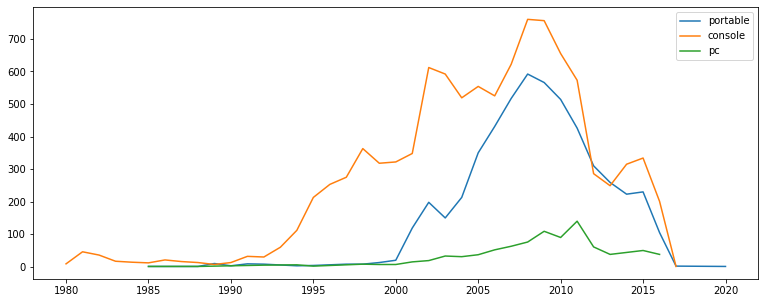

In [276]:
fig, ax1 = plt.subplots(figsize=(13, 5))

for group in df.Platform_2.unique():
  x = df[~filt][df.Platform_2 == group].Year.value_counts().sort_index().index
  y = df[~filt][df.Platform_2 == group].Year.value_counts().sort_index().values
  ax1.plot(x, y, label=group)

ax1.legend()

## 지역에 따른 분석

In [58]:
df.fillna(0, inplace=True)

In [59]:
df.isna().sum()

Name             0
Platform         0
Year             0
Genre            0
Publisher        0
Total_Shipped    0
Total_Sales      0
NA_Sales         0
PAL_Sales        0
JP_Sales         0
Other_Sales      0
Platform_2       0
dtype: int64

In [60]:
df.shape

(62426, 12)